In [3]:
from __future__ import print_function
import pylab as pl
%pylab inline
import seaborn
from scipy.optimize import curve_fit, minimize
import numpy as np

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## choose which distributions to use 

In [4]:
distributions = ['norm','pois', 'bin', 'chisq', 'geom']
md = {}

## and which mean to give it

In [5]:
mean = 50
mysize = (2000 / (np.array(range(1, 100)))).astype(int) 

# 1. Normal Distribution

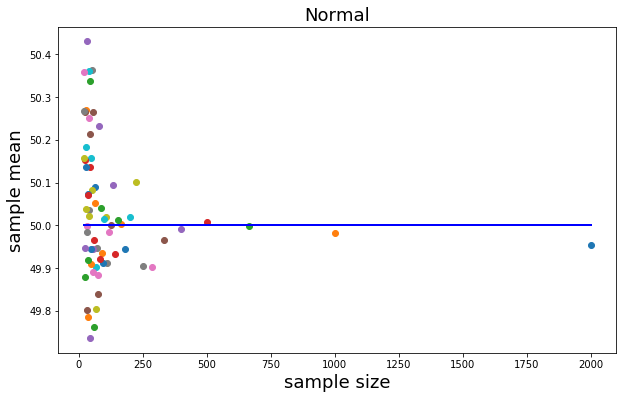

In [6]:
md['norm'] = {} 
loc = mean 

for n in mysize:
    md['norm'][n] = np.random.normal(loc, size = n)
    

md['norm']['means'] = {}
axnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['norm']:
    if not type(nn) == str:
        md['norm']['means'][nn] = md['norm'][nn].mean()
        axnorm_mu_n.plot(nn, md['norm']['means'][nn], 'o')
        axnorm_mu_n.set_xlabel('sample size', fontsize=18)
        axnorm_mu_n.set_ylabel('sample mean', fontsize=18)
        axnorm_mu_n.set_title('Normal', fontsize=18)
        axnorm_mu_n.plot([min(mysize), max(mysize)], [loc, loc], 'b')

### Figure 1: The plot of 100 samples of different sizes created from Normal(gaussian) distribution. In support of the Central Limit Theorem, we can see that it resembles a normal distribution.(Obvious for this one)

# 2. Poisson Distribution

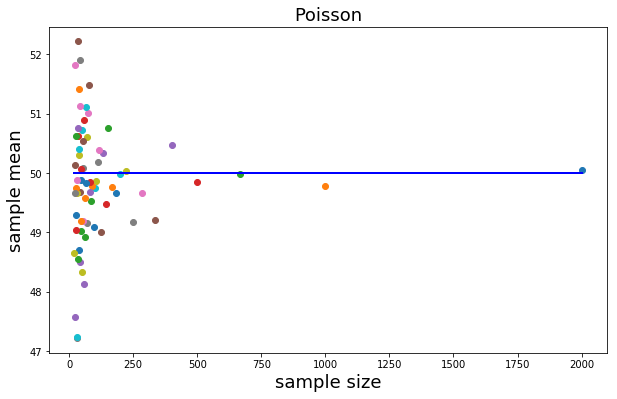

In [7]:
md['pois'] = {} 
lam = mean 

for n in mysize:
    md['pois'][n] = np.random.poisson(lam, size = n)
    

md['pois']['means'] = {}
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        axpois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('Poisson', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [lam, lam], 'b')

### Figure 2: The plot of 100 samples of different sizes created from Poisson distribution. In support of the Central Limit Theorem, we can see that it resembles a normal distribution.

# 3. Binomial Distribution

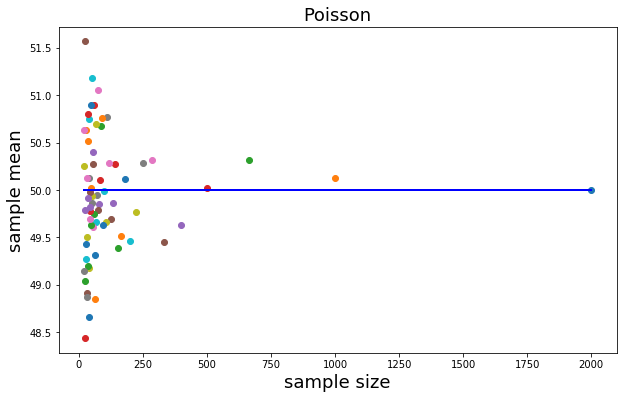

In [8]:
md['bin'] = {} 
nt = 100 #Number of trials
p = mean/nt # probability of success in each trial such that the mean stays the same

for n in mysize:
    md['bin'][n] = np.random.binomial(nt, p , size = n)
    

md['bin']['means'] = {}
axbin_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['bin']:
    if not type(nn) == str:
        md['bin']['means'][nn] = md['bin'][nn].mean()
        axbin_mu_n.plot(nn, md['bin']['means'][nn], 'o')
        axbin_mu_n.set_xlabel('sample size', fontsize=18)
        axbin_mu_n.set_ylabel('sample mean', fontsize=18)
        axbin_mu_n.set_title('Poisson', fontsize=18)
        axbin_mu_n.plot([min(mysize), max(mysize)], [nt*p, nt*p], 'b')

### Figure 3: The plot of 100 samples of different sizes created from Binomial distribution. We can see that it resembles a normal distribution.

# 4. Chi-Squared Distribution

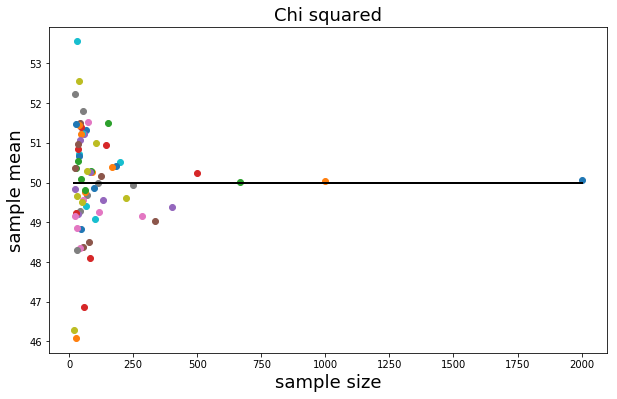

In [9]:
md['chisq'] = {} 
df = mean #k and mean is the same for chi-sq

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 4: The plot of 100 samples of different sizes created from Chi-square distribution. In support of the Central Limit Theorem, we can see that it resembles a normal distribution.

# 5. Geometric Distribution

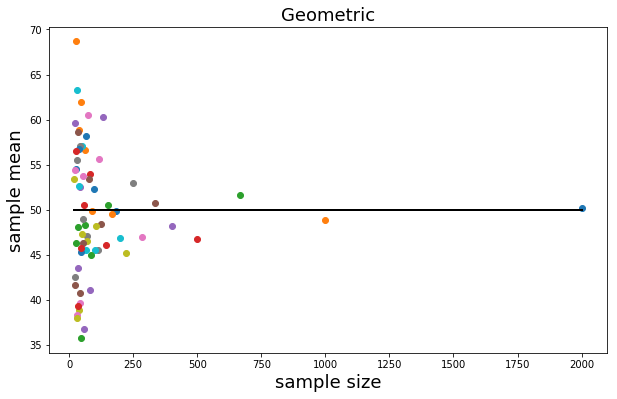

In [10]:
md['geom'] = {} 
p = 1/mean #probability of success on an individual trial

for n in mysize:
    md['geom'][n] = np.random.geometric(p, size = n)
    

md['geom']['means'] = {}
axgeom_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['geom']:
    if not type(nn) == str:
        md['geom']['means'][nn] = md['geom'][nn].mean()
        axgeom_mu_n.plot(nn, md['geom']['means'][nn], 'o')
        axgeom_mu_n.set_xlabel('sample size', fontsize=18)
        axgeom_mu_n.set_ylabel('sample mean', fontsize=18)
        axgeom_mu_n.set_title('Geometric', fontsize=18)
        axgeom_mu_n.plot([min(mysize), max(mysize)], [1/p, 1/p], 'k')

### Figure 5: The plot of 100 samples of different sizes created from Geometric distribution. In support of the Central Limit Theorem, we can see that it resembles a normal distribution.

# Distributions of all sample means

Text(0.5,1,'Distributions of all sample means')

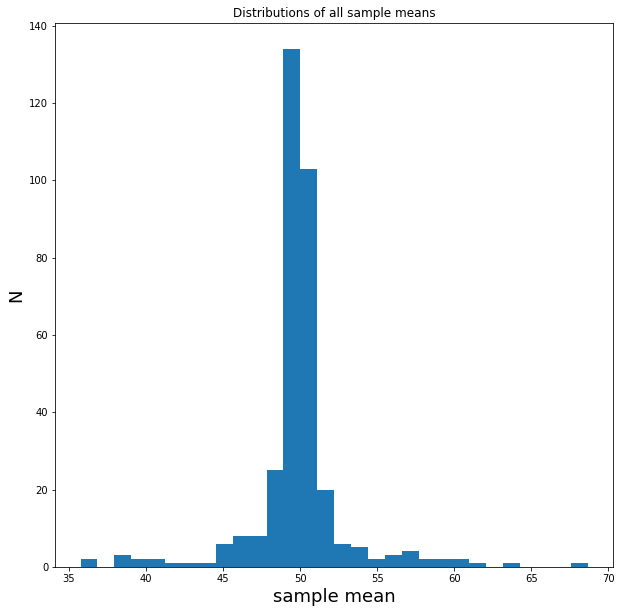

In [12]:
allmeans = list(md['norm']['means'].values())+list(md['pois']['means'].values())+list(md['bin']['means'].values()) + list(md['chisq']['means'].values())+list(md['geom']['means'].values())
pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title("Distributions of all sample means")

## Figure 6: Here also, we can see how all the distributions combined together 